In [122]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
from skimage import io, transform, color
from skimage.registration import optical_flow_tvl1, optical_flow_ilk, phase_cross_correlation

In [3]:
%matplotlib notebook

In [4]:
f = h5py.File('2019c1_Pourzal_image.dat_2022_refit/bnp_fly0002.h5', 'r')

In [5]:
print(f.keys())

<KeysViewHDF5 ['MAPS', 'exchange_0', 'exchange_1', 'exchange_2', 'exchange_3', 'exchange_4']>


In [6]:
print(f['MAPS'].keys())

<KeysViewHDF5 ['XRF_fits', 'XRF_fits_quant', 'XRF_roi', 'XRF_roi_plus', 'XRF_roi_plus_quant', 'XRF_roi_quant', 'add_float', 'add_long', 'add_string', 'channel_names', 'channel_units', 'ds_amp', 'energy', 'energy_calib', 'extra_pvs', 'extra_pvs_as_csv', 'extra_strings', 'int_spec', 'make_maps_conf', 'max_chan_spec', 'mca_arr', 'scaler_names', 'scaler_units', 'scalers', 'scan_time_stamp', 'us_amp', 'version', 'write_date', 'x_axis', 'y_axis']>


In [58]:
print(f['exchange_0'].keys())

<KeysViewHDF5 ['data', 'scaler_names', 'scaler_units', 'scalers', 'x_axis', 'y_axis']>


In [7]:
print(f['MAPS']['XRF_fits'])

<HDF5 dataset "XRF_fits": shape (24, 667, 534), type "<f4">


In [130]:
XRF_fits= f['MAPS']['XRF_fits']

In [9]:
XRF_fits.shape

(24, 667, 534)

<IPython.core.display.Javascript object>


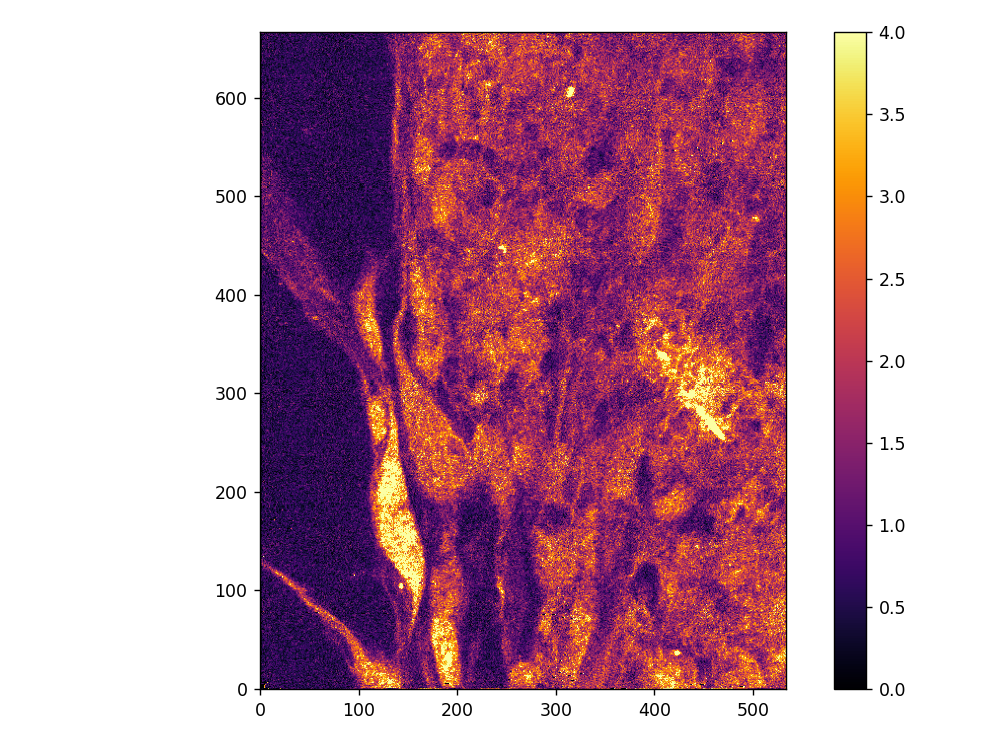

In [10]:
plt.figure()

plt.imshow(XRF_fits[15,:,:],origin='lower',vmin=0,vmax=4,cmap='inferno')

plt.colorbar()

plt.tight_layout()

In [11]:
print(f['MAPS'].keys())

<KeysViewHDF5 ['XRF_fits', 'XRF_fits_quant', 'XRF_roi', 'XRF_roi_plus', 'XRF_roi_plus_quant', 'XRF_roi_quant', 'add_float', 'add_long', 'add_string', 'channel_names', 'channel_units', 'ds_amp', 'energy', 'energy_calib', 'extra_pvs', 'extra_pvs_as_csv', 'extra_strings', 'int_spec', 'make_maps_conf', 'max_chan_spec', 'mca_arr', 'scaler_names', 'scaler_units', 'scalers', 'scan_time_stamp', 'us_amp', 'version', 'write_date', 'x_axis', 'y_axis']>


In [49]:
print(f['MAPS']['add_long'])

<HDF5 dataset "add_long": shape (5,), type "<i4">


In [133]:
XRF_roi = f['MAPS']['XRF_roi']

In [134]:
XRF_roi.shape

(24, 667, 534)

In [57]:
# print(XRF_roi)

<HDF5 dataset "energy": shape (2048,), type "<f4">


<IPython.core.display.Javascript object>


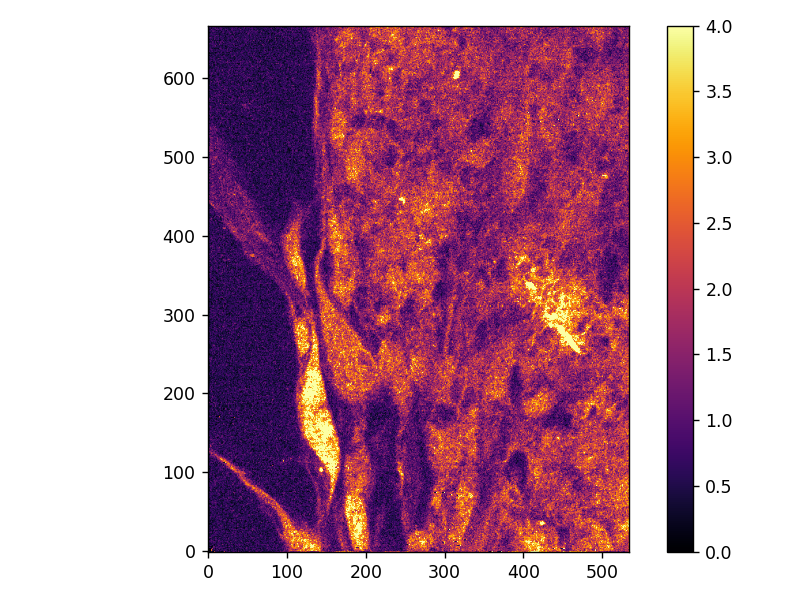

In [48]:
plt.figure()

plt.imshow(XRF_roi[15,:,:],origin='lower',vmin=0,vmax=4,cmap='inferno')

plt.colorbar()

plt.tight_layout()

In [146]:
XRF_roi_plus = f['MAPS']['XRF_roi_plus']

In [147]:
XRF_fits.shape

(24, 667, 534)

In [88]:
print(f['exchange_0'].keys())

<KeysViewHDF5 ['data', 'scaler_names', 'scaler_units', 'scalers', 'x_axis', 'y_axis']>


In [60]:
print(f['exchange_0']['data'])

<HDF5 dataset "data": shape (2000, 667, 534), type "<f4">


In [64]:
data = f['exchange_0']['data']

In [65]:
data.shape

(2000, 667, 534)

<IPython.core.display.Javascript object>


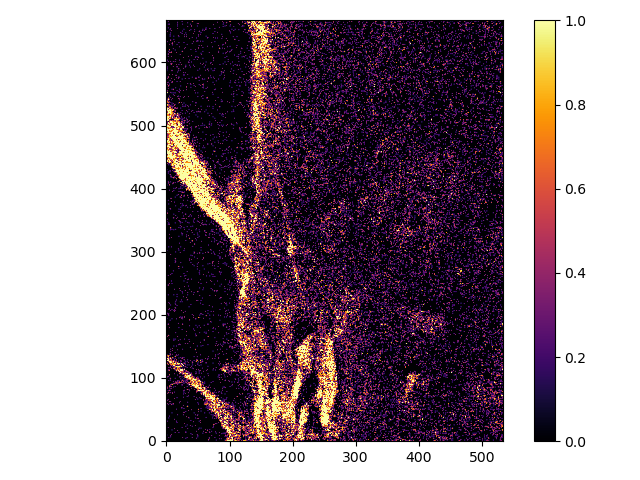

In [108]:
plt.figure()

plt.imshow(data[200,:,:],origin='lower',vmin=0,vmax=1,cmap='inferno')

plt.colorbar()

plt.tight_layout()

In [73]:
print(f['exchange_1'].keys())

<KeysViewHDF5 ['channel_names', 'channel_units', 'data', 'x_axis', 'y_axis']>


In [77]:
print(f['exchange_1']['data'])

<HDF5 dataset "data": shape (24, 667, 534), type "<f4">


In [107]:
data1 = f['exchange_1']['data']

In [79]:
data1.shape

(24, 667, 534)

<IPython.core.display.Javascript object>


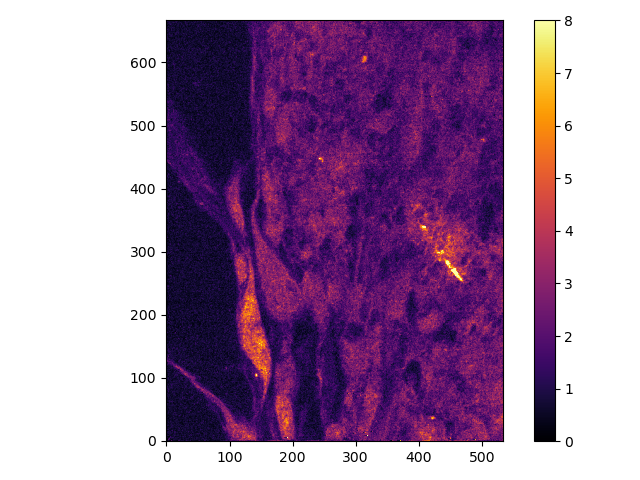

In [85]:
plt.figure()

plt.imshow(data1[15,:,:],origin='lower',vmin=0,vmax=8,cmap='inferno')

plt.colorbar()

plt.tight_layout()

In [94]:
print(f['exchange_4'].keys())

<KeysViewHDF5 ['channel_names', 'channel_units', 'data', 'x_axis', 'y_axis']>


In [99]:
data2 = f['exchange_4']['data']

<IPython.core.display.Javascript object>


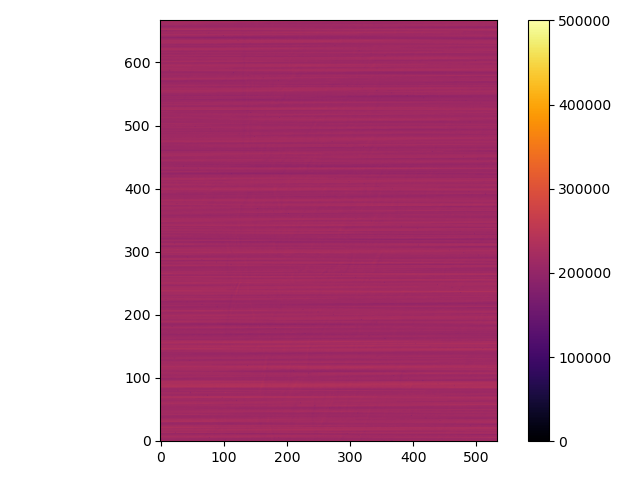

In [105]:
plt.figure()

plt.imshow(data2[15,:,:],origin='lower',vmin=0,vmax=5e5,cmap='inferno')

plt.colorbar()

plt.tight_layout()

In [106]:
data2 = f['exchange_2']['data']
data3 = f['exchange_3']['data']
data4 = f['exchange_4']['data']

<IPython.core.display.Javascript object>


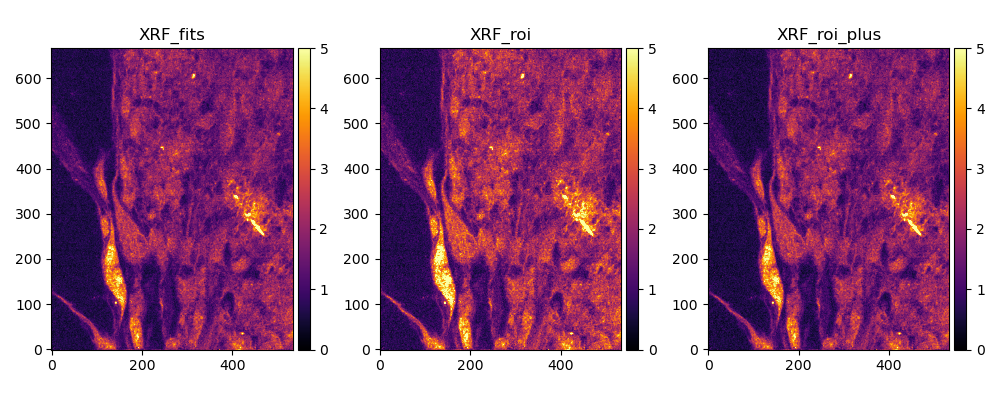

In [153]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(10,4))

im1 = ax[0].imshow(XRF_fits[15,:,:],origin='lower',vmin=0,vmax=5,cmap='inferno')
ax[0].set_title('XRF_fits')
divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

im2 = ax[1].imshow(XRF_roi[15,:,:],origin='lower',vmin=0,vmax=5,cmap='inferno')
ax[1].set_title('XRF_roi')
divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')


im3 = ax[2].imshow(XRF_roi_plus[15,:,:],origin='lower',vmin=0,vmax=5,cmap='inferno')
ax[2].set_title('XRF_roi_plus')
divider = make_axes_locatable(ax[2])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax, orientation='vertical')




plt.tight_layout()

<IPython.core.display.Javascript object>


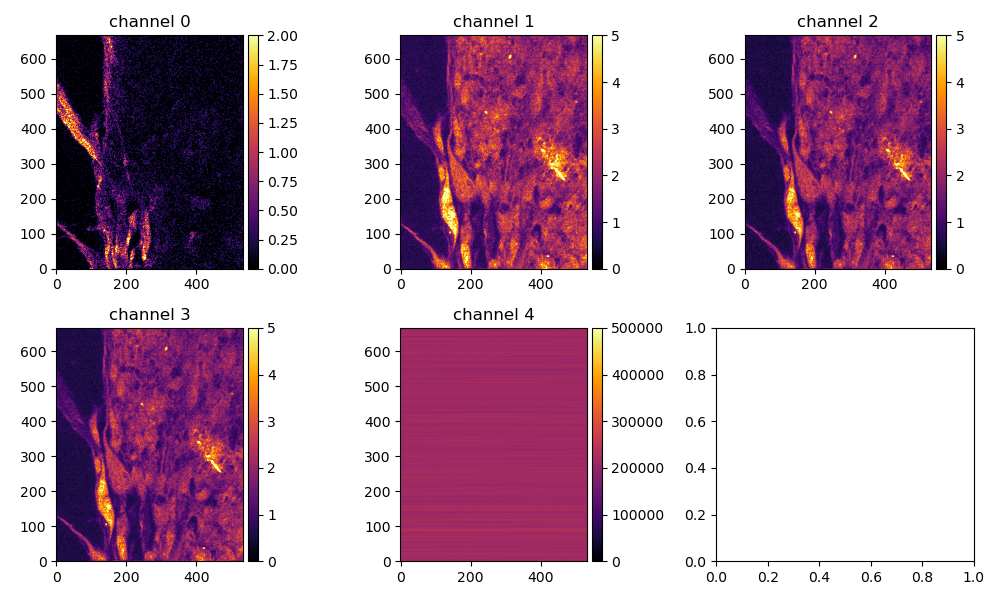

In [129]:
fig, ax = plt.subplots(nrows=2, ncols=3,figsize=(10,6))

im1 = ax[0,0].imshow(data[200,:,:],origin='lower',vmin=0,vmax=2,cmap='inferno')
ax[0,0].set_title('channel 0')
divider = make_axes_locatable(ax[0,0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

im2 = ax[0,1].imshow(data1[15,:,:],origin='lower',vmin=0,vmax=5,cmap='inferno')
ax[0,1].set_title('channel 1')
divider = make_axes_locatable(ax[0,1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')


im3 = ax[0,2].imshow(data2[15,:,:],origin='lower',vmin=0,vmax=5,cmap='inferno')
ax[0,2].set_title('channel 2')
divider = make_axes_locatable(ax[0,2])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax, orientation='vertical')

im4 = ax[1,0].imshow(data3[15,:,:],origin='lower',vmin=0,vmax=5,cmap='inferno')
ax[1,0].set_title('channel 3')
divider = make_axes_locatable(ax[1,0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im4, cax=cax, orientation='vertical')

im5 = ax[1,1].imshow(data4[15,:,:],origin='lower',vmin=0,vmax=5e5,cmap='inferno')
ax[1,1].set_title('channel 4')
divider = make_axes_locatable(ax[1,1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im5, cax=cax, orientation='vertical')



plt.tight_layout()

In [16]:
f1 = h5py.File('2019c1_Pourzal_image.dat_2022_refit/bnp_fly0003.h5', 'r')

In [17]:
print(f1.keys())

<KeysViewHDF5 ['MAPS', 'exchange_0', 'exchange_1', 'exchange_2', 'exchange_3', 'exchange_4']>


In [18]:
print(f1['MAPS'].keys())

<KeysViewHDF5 ['XRF_fits', 'XRF_fits_quant', 'XRF_roi', 'XRF_roi_plus', 'XRF_roi_plus_quant', 'XRF_roi_quant', 'add_float', 'add_long', 'add_string', 'channel_names', 'channel_units', 'ds_amp', 'energy', 'energy_calib', 'extra_pvs', 'extra_pvs_as_csv', 'extra_strings', 'int_spec', 'make_maps_conf', 'max_chan_spec', 'mca_arr', 'scaler_names', 'scaler_units', 'scalers', 'scan_time_stamp', 'us_amp', 'version', 'write_date', 'x_axis', 'y_axis']>


In [19]:
XRF_fits_1 = f1['MAPS']['XRF_fits']

In [154]:
XRF_fits_1.shape

(24, 226, 226)

<IPython.core.display.Javascript object>


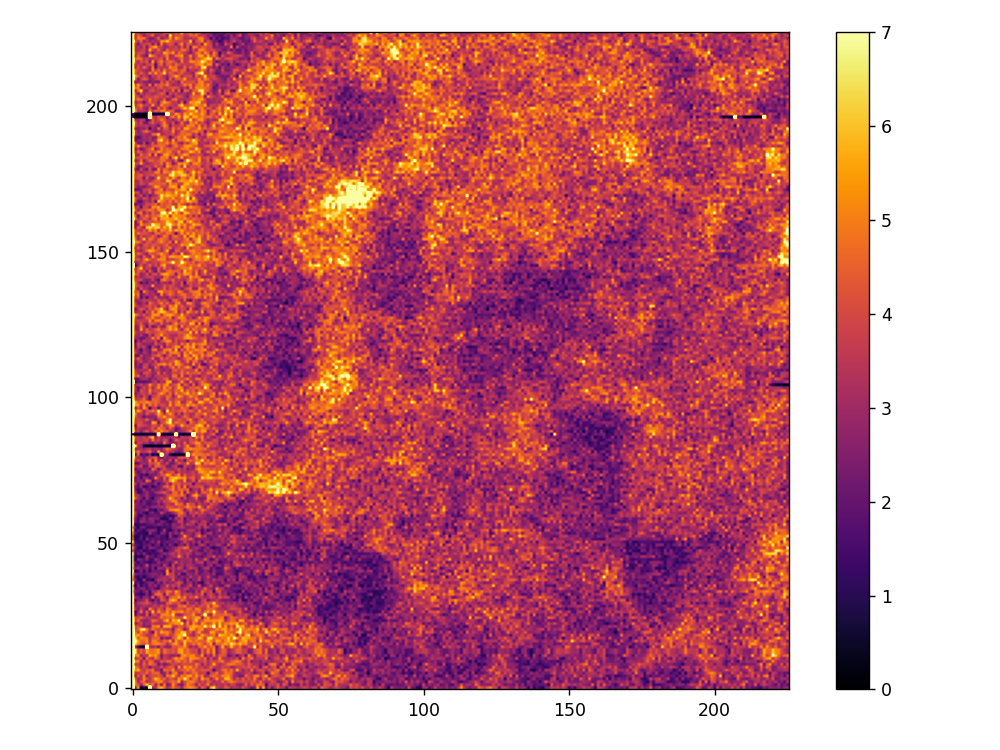

In [20]:
plt.figure()

plt.imshow(XRF_fits_1[15,:,:],origin='lower',vmin=0,vmax=7,cmap='inferno')

plt.colorbar()

plt.tight_layout()

In [21]:
f2 = h5py.File('2019c1_Pourzal_image.dat_2022_refit/bnp_fly0004.h5', 'r')

In [22]:
print(f2.keys())

<KeysViewHDF5 ['MAPS', 'exchange_0', 'exchange_1', 'exchange_2', 'exchange_3', 'exchange_4']>


In [23]:
print(f1['MAPS'].keys())

<KeysViewHDF5 ['XRF_fits', 'XRF_fits_quant', 'XRF_roi', 'XRF_roi_plus', 'XRF_roi_plus_quant', 'XRF_roi_quant', 'add_float', 'add_long', 'add_string', 'channel_names', 'channel_units', 'ds_amp', 'energy', 'energy_calib', 'extra_pvs', 'extra_pvs_as_csv', 'extra_strings', 'int_spec', 'make_maps_conf', 'max_chan_spec', 'mca_arr', 'scaler_names', 'scaler_units', 'scalers', 'scan_time_stamp', 'us_amp', 'version', 'write_date', 'x_axis', 'y_axis']>


In [24]:
XRF_fits_2 = f2['MAPS']['XRF_fits']

<IPython.core.display.Javascript object>


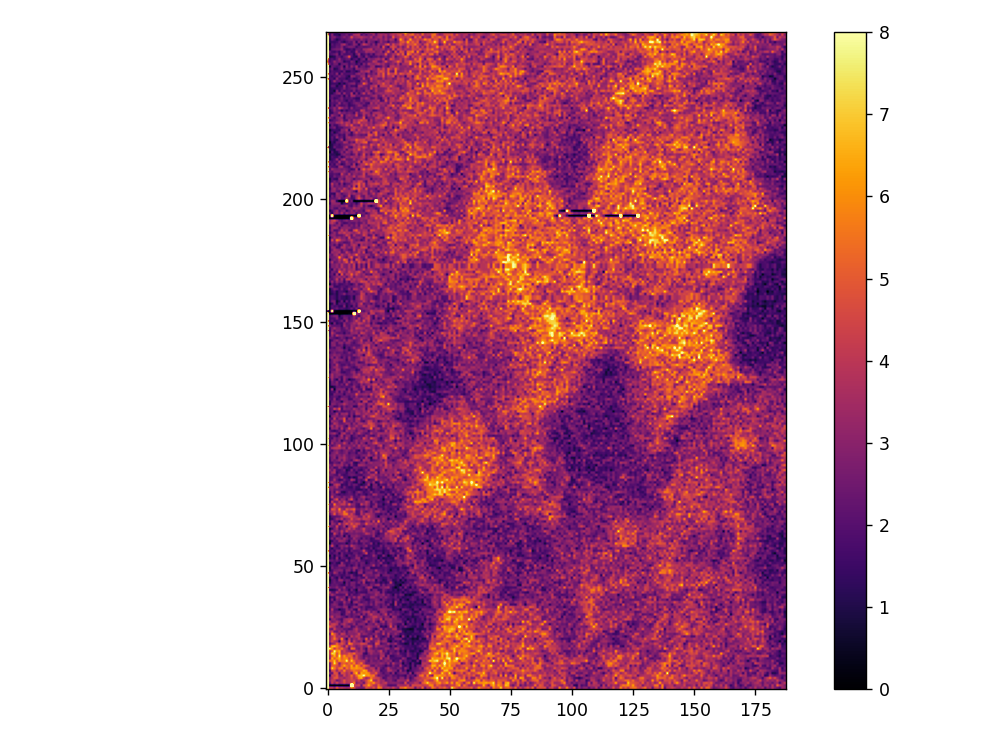

In [25]:
plt.figure()

plt.imshow(XRF_fits_2[15,:,:],origin='lower',vmin=0,vmax=8,cmap='inferno')

plt.colorbar()

plt.tight_layout()

In [26]:
img1 = XRF_fits[15,:,:]
img2 = XRF_fits_1[15,:,:]
img3 = XRF_fits_2[15,:,:]

<IPython.core.display.Javascript object>


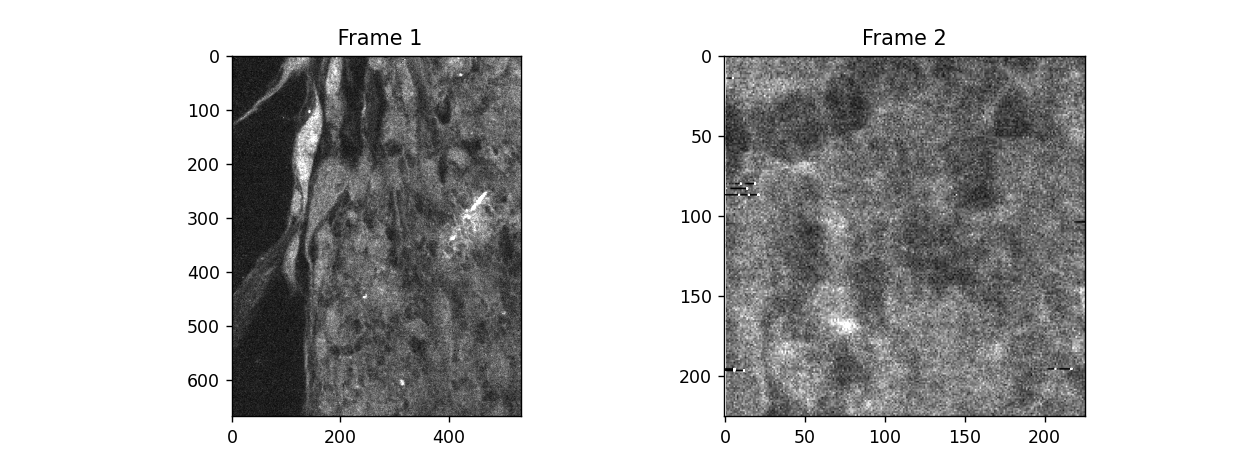

Text(0.5, 1.0, 'Frame 2')

In [27]:
# Display the two original images

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 3))
im0 = ax0.imshow(img1, cmap='gray',vmin=0,vmax=5)
ax0.set_title(" Frame 1")
# plt.colorbar(im0)

im1 = ax1.imshow(img2, cmap='gray',vmin=0,vmax=8)
ax1.set_title("Frame 2",)
# plt.colorbar(im1)

In [28]:
########## phase cross correlation for global registration ########## 

shift, error, diffphase = phase_cross_correlation(img1, img2)
print(f"Shift in X: {shift[1]}")
print(f"Shift in Y: {shift[0]}")

ValueError: images must be same shape